In [1]:
# General
from os import path
from random import randrange

from sklearn.model_selection import train_test_split, GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import pickle
import joblib 


## TRAIN SET

In [2]:
trainDataFull = pd.read_csv("trainData.csv")
trainDataFull.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4,9
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2,6
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0,3


In [3]:
trainDataFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 104 entries, v1 to target
dtypes: float64(103), int64(1)
memory usage: 49.1 MB


In [4]:
trainDataFull.describe()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.077721,0.030062,0.194955,0.561411,0.157148,0.510892,0.339339,0.060755,0.133253,0.528776,...,0.052726,0.316979,0.042697,0.290546,0.617066,0.304186,0.430156,0.837012,0.279162,4.842335
std,0.515539,0.328176,0.737317,1.003366,0.479018,0.786976,0.632642,0.385161,0.639593,0.925803,...,0.151387,0.515414,0.208958,0.742261,0.928514,0.923758,0.804039,1.204724,0.692345,2.510794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.200000,0.400000,0.000000,5.000000
75%,0.000000,0.000000,0.200000,0.600000,0.200000,0.600000,0.400000,0.000000,0.000000,0.600000,...,0.000000,0.400000,0.000000,0.200000,0.800000,0.200000,0.400000,1.000000,0.200000,7.000000
max,19.400000,17.400000,17.000000,15.200000,13.400000,15.200000,6.600000,12.400000,21.000000,52.600000,...,4.400000,9.800000,9.600000,20.000000,16.600000,15.200000,17.400000,53.200000,18.200000,9.000000


In [5]:
trainData = trainDataFull.loc[:,'v1':'v99']
trainData.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.2,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0


In [6]:
trainLabels = trainDataFull.loc[:,'target']
trainLabels.unique()

array([9, 6, 3, 4, 2, 8, 7, 1, 5])

In [7]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(trainLabels)
label_encoded_y = label_encoder.transform(trainLabels)
label_encoded_y

array([8, 5, 2, ..., 7, 4, 2])

## Normalize

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(trainData.values)

StandardScaler()

In [10]:
scaler.mean_

array([0.07772068, 0.03006238, 0.19495459, 0.56141116, 0.15714794,
       0.5108924 , 0.3393387 , 0.06075503, 0.13325253, 0.52877598,
       0.17498303, 0.04794919, 0.20598597, 0.02522706, 0.0281748 ,
       0.0732215 , 0.06966289, 0.09711691, 0.05261321, 0.09430492,
       0.41449303, 0.04993374, 0.07870972, 0.02850448, 0.13248651,
       0.04779405, 0.13960374, 0.33061185, 0.05278128, 0.01065969,
       0.04444552, 0.05515369, 0.13932254, 0.14599373, 0.06182165,
       0.08841268, 0.06069362, 0.17855781, 0.09934387, 0.07602379,
       0.09619574, 0.22571512, 0.30690391, 0.03759656, 0.06008921,
       0.1717444 , 0.00513914, 0.25057371, 0.15581628, 0.09155435,
       0.13961343, 0.14969133, 0.18928214, 0.13959404, 0.03371796,
       0.20225928, 0.02973593, 0.01569217, 0.11821003, 0.28269175,
       0.0248392 , 0.11508452, 0.25135913, 0.07858043, 0.01415043,
       0.20875917, 0.25687967, 0.06485665, 0.11262161, 0.09022916,
       0.16222567, 0.11216587, 0.18029348, 0.16248424, 0.07328

In [11]:
normalized_standart = scaler.transform(trainData)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(normalized_standart, 
                                                    label_encoded_y, 
                                                    test_size = 0.3, 
                                                    random_state = 33,
                                                    shuffle = True,
                                                    stratify = label_encoded_y)

## MODEL-2 (Random Forest Classifier)

In [13]:
RFC_model = RandomForestClassifier(n_estimators=1000,
                                   verbose=2,
                                   random_state=0,
                                   criterion='gini')
RFC_model

RandomForestClassifier(n_estimators=1000, random_state=0, verbose=2)

In [14]:
RFC_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tre

building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tre

building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


RandomForestClassifier(n_estimators=1000, random_state=0, verbose=2)

In [15]:
# make predictions for test data
y_pred = RFC_model.predict(X_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


array([1, 1, 8, ..., 5, 1, 1])

In [16]:
predictions = [round(value) for value in y_pred]

In [17]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.95%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


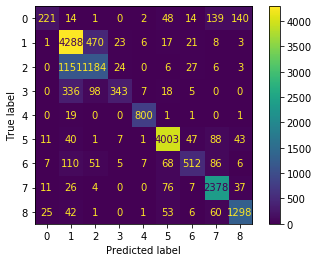

In [18]:
#fig = plt.figure(figsize=(10,10))
plot_confusion_matrix(RFC_model,
                     X_test,
                     y_test,
                     values_format='d')

## Save Valid Score

In [19]:
y_score = RFC_model.predict_proba(X_test)
y_score[0]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


array([0.057, 0.31 , 0.178, 0.006, 0.01 , 0.135, 0.095, 0.152, 0.057])

In [20]:
valid_score = pd.DataFrame(y_score, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
valid_score

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.057,0.310,0.178,0.006,0.010,0.135,0.095,0.152,0.057
1,0.002,0.546,0.336,0.080,0.001,0.003,0.023,0.002,0.007
2,0.228,0.010,0.001,0.012,0.000,0.012,0.008,0.013,0.716
3,0.040,0.036,0.016,0.014,0.000,0.124,0.024,0.116,0.630
4,0.004,0.784,0.111,0.060,0.011,0.002,0.022,0.001,0.005
...,...,...,...,...,...,...,...,...,...
18559,0.008,0.304,0.631,0.000,0.016,0.003,0.016,0.011,0.011
18560,0.324,0.073,0.070,0.005,0.003,0.059,0.089,0.177,0.200
18561,0.006,0.011,0.009,0.004,0.003,0.914,0.017,0.034,0.002
18562,0.000,0.967,0.019,0.014,0.000,0.000,0.000,0.000,0.000


In [21]:
valid_score.to_csv('./results/valid-submission-RFC-standart-norm-3.csv', index = False)

## Save & Load Model

## joblib

In [24]:
# Save the model as a pickle in a file 
joblib.dump(RFC_model, './model/model_RFC-standart-norm-3.pkl') 
  
# Load the model from the file 
RFC_model_from_joblib = joblib.load('./model/model_RFC-standart-norm-3.pkl')  
  
# Use the loaded model to make predictions 
RFC_model_predictions = RFC_model_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, RFC_model_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy: 80.95%


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


## GridSearchCV 

In [ ]:
clf = GridSearchCV(RFC_model_model,
                   {'max_depth': [4, 6],
                    'n_estimators': [100, 200]}, 
                    verbose=1,
                   cv=2)
clf.fit(X_train, 
        y_train, 
        early_stopping_rounds=10,
        eval_metric='mlogloss',
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=True)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(clf.best_estimator_, './model/clf.pkl')

# Load the model from the file 
clf_from_joblib = joblib.load('./model/clf.pkl')  

# Use the loaded model to make predictions 
clf_predictions = clf_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, clf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# TEST

In [25]:
testData = pd.read_csv("testData.csv")
testData

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,0.0,0.0,0.0,0.0,0.2,0.2,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.6,5.0,0.0
1,0.0,0.0,0.0,5.2,0.0,0.0,0.0,0.0,1.6,0.8,...,0.0,0.0,0.8,0.0,0.0,3.6,0.4,0.0,2.4,0.0
2,0.0,0.0,0.8,2.2,0.0,0.4,0.0,0.0,0.2,0.0,...,0.0,0.0,0.4,0.0,0.2,1.6,0.6,0.0,0.6,1.6
3,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.6,0.2,0.0,0.0,0.4,0.0,0.0,0.0,0.8,...,0.0,0.0,0.6,0.0,0.0,0.2,0.2,0.6,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,1.2,0.0,0.4,0.0,0.6,0.0
144364,0.0,0.0,0.0,0.0,0.4,0.0,0.6,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2.6,0.0
144365,0.0,0.0,0.0,0.4,0.2,1.4,1.4,0.0,0.2,0.2,...,0.0,0.6,0.2,0.0,0.2,1.2,0.0,1.4,0.6,0.2
144366,0.0,0.0,0.0,0.2,0.0,0.8,1.2,0.0,0.0,0.4,...,0.0,0.0,0.4,0.0,0.0,0.2,0.2,1.2,1.4,0.0


In [26]:
test_normalized_standart = scaler.transform(testData.values)
test_normalized_standart

array([[-0.15075752, -0.09160521, -0.2644128 , ...,  0.21123996,
         3.45558241, -0.40321577],
       [-0.15075752, -0.09160521, -0.2644128 , ..., -0.53499811,
         1.2973938 , -0.40321577],
       [-0.15075752, -0.09160521,  0.82061035, ..., -0.53499811,
        -0.19673677,  1.90778902],
       ...,
       [-0.15075752, -0.09160521, -0.2644128 , ...,  1.20622404,
        -0.19673677, -0.11434017],
       [-0.15075752, -0.09160521, -0.2644128 , ...,  0.95747802,
         0.46732126, -0.40321577],
       [-0.15075752, -0.09160521,  0.00684299, ..., -0.28625209,
         0.96536479, -0.40321577]])

In [24]:
# Use the loaded model to make predictions 
# test_predictions = RFC_model.predict(test_normalized_standart)
# test_predictions

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.9s finished


array([1, 5, 5, ..., 1, 1, 1])

In [27]:
# Use the loaded model to make predictions probability
test_predictions = RFC_model.predict_proba(test_normalized_standart)
test_predictions

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   32.9s finished


array([[0.011, 0.234, 0.27 , ..., 0.03 , 0.015, 0.006],
       [0.022, 0.052, 0.041, ..., 0.017, 0.329, 0.032],
       [0.003, 0.   , 0.001, ..., 0.   , 0.003, 0.001],
       ...,
       [0.004, 0.463, 0.298, ..., 0.04 , 0.014, 0.007],
       [0.   , 0.603, 0.115, ..., 0.005, 0.   , 0.004],
       [0.004, 0.403, 0.456, ..., 0.045, 0.004, 0.   ]])

In [28]:
result = pd.DataFrame(test_predictions, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
result

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.011,0.234,0.270,0.416,0.000,0.018,0.030,0.015,0.006
1,0.022,0.052,0.041,0.017,0.004,0.486,0.017,0.329,0.032
2,0.003,0.000,0.001,0.001,0.000,0.991,0.000,0.003,0.001
3,0.004,0.543,0.322,0.059,0.000,0.003,0.006,0.009,0.054
4,0.113,0.017,0.006,0.002,0.001,0.031,0.020,0.337,0.473
...,...,...,...,...,...,...,...,...,...
144363,0.329,0.054,0.039,0.031,0.001,0.216,0.114,0.057,0.159
144364,0.005,0.367,0.439,0.120,0.001,0.005,0.057,0.003,0.003
144365,0.004,0.463,0.298,0.160,0.005,0.009,0.040,0.014,0.007
144366,0.000,0.603,0.115,0.270,0.001,0.002,0.005,0.000,0.004


In [29]:
result.to_csv('./results/test-submission-RFC-standart-norm-3.csv', index = False)

## REFERENCES

1- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

2- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

3- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

4- https://www.datacamp.com/community/tutorials/xgboost-in-python

5- https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

6- https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012782&gclid=EAIaIQobChMI49HTjNO06wIVB-ztCh23nwMLEAAYASAAEgKKEvD_BwE